'https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from apyori import apriori

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv')

In [4]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [8]:
####### which are 10 most top selling items
df.itemDescription.value_counts().head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

<AxesSubplot:>

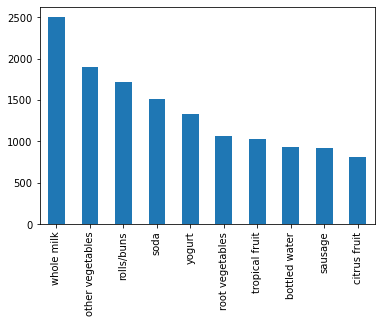

In [9]:
####### which are 10 most top selling items
df.itemDescription.value_counts().head(10).plot.bar()

In [10]:
####### which are 10 least selling items
df.itemDescription.value_counts().tail(10)

whisky                   8
salad dressing           6
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
bags                     4
baby cosmetics           3
kitchen utensil          1
preservation products    1
Name: itemDescription, dtype: int64

In [11]:

df.Member_number.value_counts().head(10)

3180    36
3737    33
3050    33
2051    33
2625    31
3915    31
2433    31
2271    31
3872    30
3289    29
Name: Member_number, dtype: int64

In [12]:

df.Member_number.value_counts().tail(10)

2735    2
3949    2
2304    2
4844    2
4386    2
2503    2
3301    2
1775    2
3723    2
2417    2
Name: Member_number, dtype: int64

In [13]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

C:\Users\khush\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '21-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\khush\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '19-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\khush\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14-02-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\khush\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '23-12-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

C:\Users\khush\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '21-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\khush\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '19-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\khush\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14-02-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\khush\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '23-12-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

C:\Users\khush\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16-12-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\khush\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '15-11-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\khush\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16-10-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\khush\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14-08-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

In [14]:
df

,Member_number,Date,itemDescription,year,month,day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1
2,2300,19-09-2015,pip fruit,2015,9,19
3,1187,12-12-2015,other vegetables,2015,12,12
4,3037,01-02-2015,whole milk,2015,1,2
...,...,...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,2014,8,10
38761,2022,23-02-2014,candy,2014,2,23
38762,1097,16-04-2014,cake bar,2014,4,16
38763,1510,03-12-2014,fruit/vegetable juice,2014,3,12


In [15]:
df.year.value_counts()

2015    20488
2014    18277
Name: year, dtype: int64

In [16]:
df.month.value_counts()

8     3498
5     3335
1     3333
6     3316
3     3283
11    3273
7     3268
10    3218
4     3172
12    3074
2     3032
9     2963
Name: month, dtype: int64

In [17]:
df.day.value_counts()

28    1375
21    1354
26    1351
8     1349
14    1341
13    1341
27    1327
4     1308
10    1308
11    1297
5     1290
24    1290
18    1285
7     1277
23    1277
22    1272
19    1272
9     1271
2     1252
1     1250
15    1245
3     1243
6     1232
25    1229
20    1214
30    1201
17    1181
12    1179
16    1158
29    1124
31     672
Name: day, dtype: int64

In [19]:
df[df.year==2015]['month'].value_counts()

8     1963
1     1829
3     1792
6     1791
11    1777
5     1710
4     1666
10    1663
7     1645
9     1613
12    1554
2     1485
Name: month, dtype: int64

In [20]:
data = df.copy()

In [21]:
data1 = data.copy()

In [22]:
df.head()

,Member_number,Date,itemDescription,year,month,day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1
2,2300,19-09-2015,pip fruit,2015,9,19
3,1187,12-12-2015,other vegetables,2015,12,12
4,3037,01-02-2015,whole milk,2015,1,2


In [24]:
data = pd.get_dummies(data['itemDescription'])

In [25]:
data.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
data1.drop(['itemDescription'],axis=1,inplace=True)

In [27]:
data1

,Member_number,Date,year,month,day
0,1808,21-07-2015,2015,7,21
1,2552,05-01-2015,2015,5,1
2,2300,19-09-2015,2015,9,19
3,1187,12-12-2015,2015,12,12
4,3037,01-02-2015,2015,1,2
...,...,...,...,...,...
38760,4471,08-10-2014,2014,8,10
38761,2022,23-02-2014,2014,2,23
38762,1097,16-04-2014,2014,4,16
38763,1510,03-12-2014,2014,3,12


In [28]:
data1 = data1.join(data)

In [29]:
data1

,Member_number,Date,year,month,day,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,2015,7,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,2015,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,19-09-2015,2015,9,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,12-12-2015,2015,12,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,01-02-2015,2015,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,4471,08-10-2014,2014,8,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38761,2022,23-02-2014,2014,2,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38762,1097,16-04-2014,2014,4,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38763,1510,03-12-2014,2014,3,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
products= df['itemDescription'].unique()

In [31]:
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [32]:
len(products)

167

In [33]:
data2 = data1.groupby(['Member_number','Date'])[products[:]].sum()

In [34]:
data2.head()

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015                     0               0            0   
              25-11-2015                     0               0            0   
              27-05-2015                     0               0            0   

                          make up remover  toilet cleaner  \
Member_number Date                                          
1000          15-03-2015                0               0   
              24-06-2014                0               0   
              24-07-2015                0               0   
              25-11-2015                0               0   
              27-05-2015                0               0   

                          preservation products  
Member_number Date                               
1000          15-03-2015                      0  
              24-06-2014                      0  
              24-07-2015                      0  
              25-11-2015                      0  
              27-05-2015                      0  

[5 rows x 167 columns]

In [35]:
data2 = data2.reset_index()[products]

In [36]:
data2

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data2.values

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [38]:
def funct(data):
    for i in products:
        if data[i]>0:
            data[i] = i
    return data

In [39]:
data2 = data2.apply(funct,axis=1)

In [40]:
data2

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,tropical fruit,0,0,other vegetables,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
new_data = data2.values

In [42]:
new_data

array([[0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)